In [1]:
###############################################################################
# Calculating forces on hydrodynamically and acoustically interacting spheres
# in the Rayleigh limit
# Methods based on Multibody Dynamics in Acoustophoresis (Baasch et al.)
import numpy as np
import pylab as plt
%matplotlib inline 
from matplotlib import animation, rc
from IPython.display import HTML

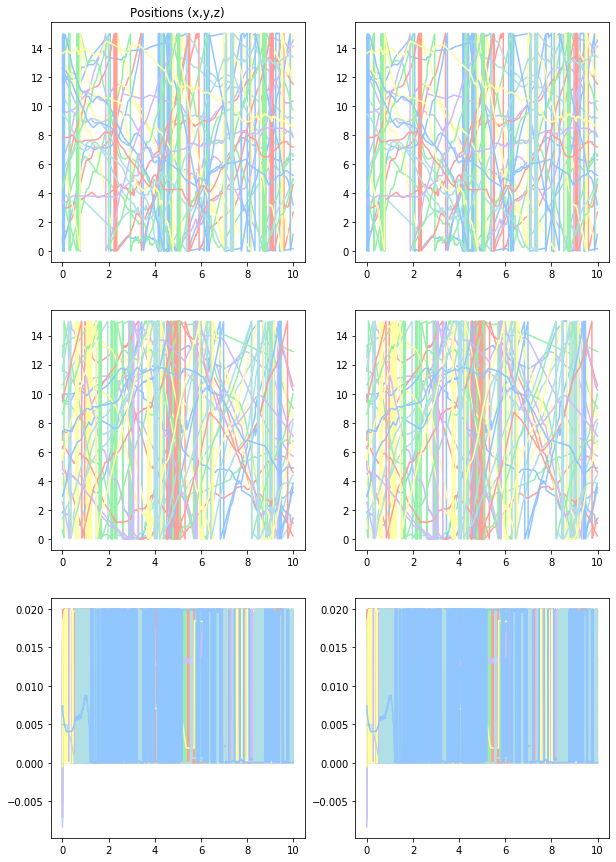

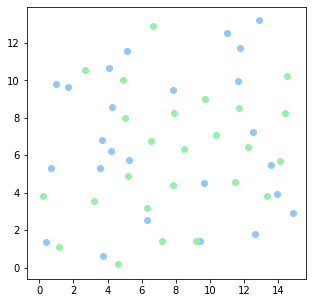

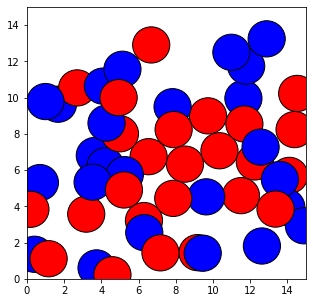

In [40]:
num_particles = 25
radius = 1
particle_vel = np.zeros((num_particles,3))
max_iterations = 100 # for checking particle overlap at each timestep
overlap_tol = .01 # tolerance for overlapping particles to not repeatedly run excluded volume check

def force_grav(rho_p,rho_m,radius):
    g = 9.81
    volume = 4/3 * np.pi * radius**3
    force = (rho_m-rho_p)*volume*g
    return force

def initialize_pos(x_range, y_range, z_range):
    particle_pos = np.zeros((num_particles,3))
    for i in range(num_particles):
        particle_pos[i,0] = np.random.uniform(low=x_range[0], high=x_range[1])
        particle_pos[i,1] = np.random.uniform(low=y_range[0], high=y_range[1])
        particle_pos[i,2] = np.random.uniform(low=z_range[0], high=z_range[1])
    return particle_pos

# Update positions, applying periodic BCs
def update_pos(particle_pos, particle_vel, timestep):
    new_pos = particle_pos + particle_vel*timestep
    new_pos, new_vel = exclude_volume(new_pos,particle_vel,timestep,radius)
    new_pos = new_pos % (x_size,y_size,z_size)
    return new_pos, new_vel

# Excluded volume interaction
def exclude_volume(particle_pos, particle_vel, timestep, radius):
    # Loops for pairwise checking without self- or double-counting
    num_iterations = 0
    while num_iterations < max_iterations:
        num_iterations += 1
        num_overlaps = 0
        for i in range(0,num_particles-1):
            for j in range(i+1,num_particles):
                distance_vector = particle_pos[i,:]-particle_pos[j,:]
                distance = np.sqrt(np.sum(distance_vector**2))
                overlap_length = 2*radius-distance
                if overlap_length >overlap_tol:
                    num_overlaps += 1
                    particle_pos[i,:]+= distance_vector/np.linalg.norm(distance_vector) * overlap_length/2
                    particle_pos[j,:]-= distance_vector/np.linalg.norm(distance_vector) * overlap_length/2
                    # 
                    # re-apply periodic BCs while doing this
                    particle_pos[i,:] = particle_pos[i,:] % (x_size, y_size, z_size)
                    particle_pos[j,:] = particle_pos[j,:] % (x_size, y_size, z_size)
#         if num_iterations == max_iterations -1:
#             print('Could not exclude all particles within max num of iterations')
        if num_overlaps == 0:
            break
    return particle_pos, particle_vel


def run(time_max,timestep):
    times = []
    positions = []
    velocities = []
    particle_pos = initialize_pos(x_range,y_range,z_range)
    particle_vel = initialize_pos([-10,10],[-10,10],[0,0])
    num_steps = int(time_max/timestep)
    for i in range(num_steps):
        times.append(timestep*i)
        positions.append(particle_pos)
        velocities.append(particle_vel)
        particle_pos, particle_vel = update_pos(particle_pos,particle_vel,timestep)
    return times, positions, velocities

x_range = [0,15]
y_range = [0,15]
z_range = [-.01,.01]
x_size = x_range[1]-x_range[0]
y_size = y_range[1]-y_range[0]
z_size = z_range[1]-z_range[0]


times, positions, velocities = run(10,.01)

positions = np.asarray(positions)
velocities = np.asarray(positions)
# # Individual position and velocity component plots
# fig, axes = plt.subplots(ncols=2,nrows=3, figsize =(10,15))
# axes[0,0].set_title('Positions (x,y,z)')
# axes[0,0].plot(times,positions[:,:,0])
# axes[1,0].plot(times,positions[:,:,1])
# axes[2,0].plot(times,positions[:,:,2])
# axes[0,1].plot(times,velocities[:,:,0])
# axes[1,1].plot(times,velocities[:,:,1])
# axes[2,1].plot(times,velocities[:,:,2])

# Plot of xy projection: start and end
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
axes.scatter(positions[0,:,0],positions[0,:,1])
axes.scatter(positions[-1,:,0],positions[-1,:,1])

# Plot as circles to visualize their size
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(x_range)
axes.set_ylim(y_range)
for i in range(num_particles):
    circle_start = plt.Circle((positions[0,i,0], positions[0,i,1]), radius, color='blue', ec='black')
    circle_end = plt.Circle((positions[-1,i,0], positions[-1,i,1]), radius, color='red', ec='black')
    axes.add_artist(circle_start)
    axes.add_artist(circle_end)

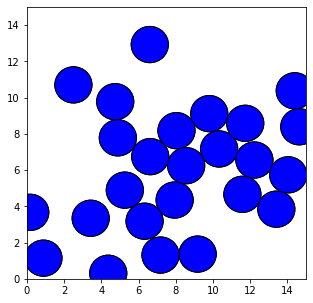

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(x_range)
ax.set_ylim(y_range)

dict_of_circles = {}
x_pos = positions[:,:,0]
y_pos = positions[:,:,1]
for n in range(num_particles):
    dict_of_circles["circle"+str(n)] = plt.Circle((x_pos[0,n],y_pos[0,n]),radius,fc='b',ec='k')


def init():
    for n in range(num_particles):
        dict_of_circles["circle"+str(n)].center = (x_pos[0,n],y_pos[0,n])
        ax.add_patch(dict_of_circles["circle"+str(n)])
    return dict_of_circles.values()

def animate(i):
    for n in range(num_particles):
        dict_of_circles["circle"+str(n)].center = (x_pos[i,n],y_pos[i,n])
    return dict_of_circles.values()
anim_step=4
num_steps = len(positions[:,0,0])
frame_list = np.arange(0,num_steps,anim_step)
anim=animation.FuncAnimation(fig,animate,init_func=init,frames=frame_list,blit=True)

HTML(anim.to_html5_video())

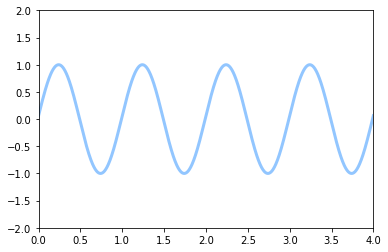

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


HTML(anim.to_html5_video())

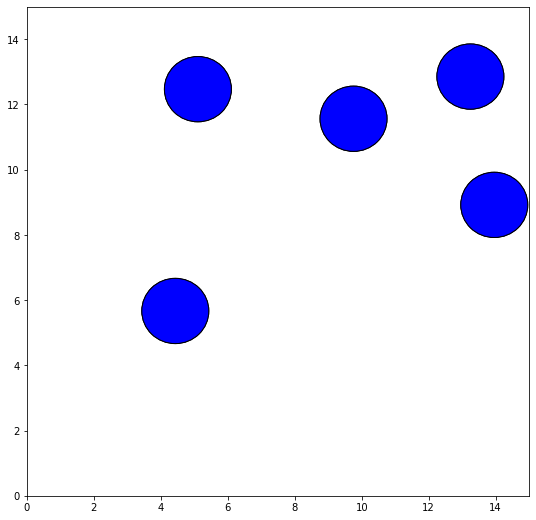

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


fig, ax = plt.subplots(figsize=(9,9))
ax.set_xlim(x_range)
ax.set_ylim(y_range)
dict_of_circles = {}
x_pos = positions[:,:,0]
y_pos = positions[:,:,1]
for n in range(num_particles):
    dict_of_circles["circle"+str(n)] = plt.Circle((x_pos[0,n],y_pos[0,n]),radius,fc='b',ec='k')


def init():
    for n in range(num_particles):
        dict_of_circles["circle"+str(n)].center = (x_pos[0,n],y_pos[0,n])
        ax.add_patch(dict_of_circles["circle"+str(n)])
    return dict_of_circles.values()

def animate(i):
    for n in range(num_particles):
        dict_of_circles["circle"+str(n)].center = (x_pos[i,n],y_pos[i,n])
    return dict_of_circles.values()

anim=animation.FuncAnimation(fig,animate,init_func=init,frames=100,blit=True)

HTML(anim.to_html5_video())